In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pandas as _pd
import glob as _gl
import pymad8 as _m8
import pybdsim as _bd
import beamTracking
import beamWire
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

Welcome to JupyROOT 6.29/01


In [2]:
date = "2023_06_09"
save_name_prefix = "plots/BeamWire/" + date + "_T20_plot"

In [3]:
#beamWire.analyticConvolution()

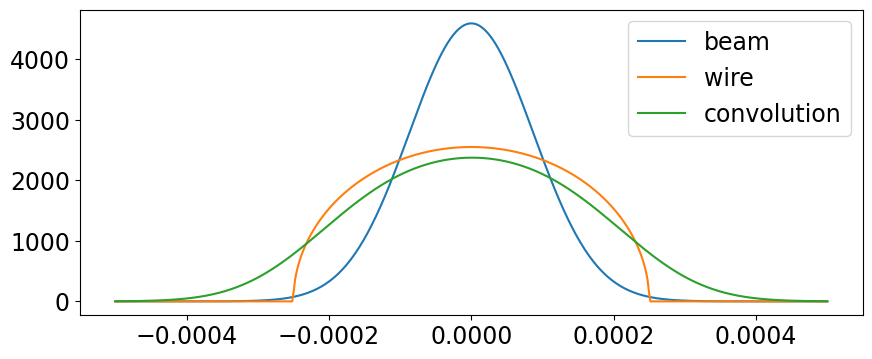

In [4]:
beamWire.PlotConvolutionExample()
#_plt.savefig("{}_convolution_example".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

In [17]:
valuelist=['-0.50','-0.45','-0.40','-0.35','-0.30','-0.25','-0.20','-0.15','-0.10','-0.05',
           '+0.00',
           '+0.05','+0.10','+0.15','+0.20','+0.25','+0.30','+0.35','+0.40','+0.45','+0.50']
#valuelist=['1e0', '2e0', '2e0', '3e0', '4e0', '5e0', '6e0', '7e0' , '8e0', '9e0', '1e1']
#valuelist=['+0.10', '+0.11', '+0.12', '+0.13', '+0.14', '+0.15', '+0.16', '+0.17', '+0.18', '+0.19', 
#           '+0.20', '+0.21', '+0.22', '+0.23', '+0.24', '+0.25', '+0.26', '+0.27', '+0.28', '+0.29', '+0.30']
beamWire.GenerateAllGmadFilesAndList(tag="T20_for_wire", valuetoscan='wireOffsetX', valuelist=valuelist)


In [19]:
inputfile = "../03_bdsimModel/T20_for_wire_with_offset_+0.00_bias_5e0.gmad"
outputfile = "../04_dataLocal/TEST_10000_part_T20_for_wire_with_offset_+0.00_bias_5e0"

beamWire.runOneOffset(inputfile, outputfilename=outputfile, npart=10000, seed=0, silent=True)
beamWire.analysis(outputfile+'.root')

BDSIM output file - using DataLoader
File : ../04_dataLocal/TEST_10000_part_T20_for_wire_with_offset_+0.00_bias_5e0.root  / Nb of entries =  10000


In [ ]:
beamWire.runScanOffset(tagfilelist="tagfilelistwire", npart=10000, seed=None, silent=True)

In [8]:
beamWire.analysis(_gl.glob("../04_dataLocal/10000_part_T20_for_wire_with*.root"))

BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_-0.20_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_+0.00_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_-0.50_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_-0.40_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_-0.30_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_+0.10_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_+0.30_bias_5e0.root  / Nb of entries =  10000
BDSIM 

0

In [9]:
#OFFSETS, NPHOTONS, ERRORS = beamWire.countPhotonsInHistAllFiles('../06_analysis/T20_for_wire_with_offset_[-+]0.[0-9][05]_bias_5e0_merged_hist.root', 'PHOTONS_R')
OFFSETS, NPHOTONS, ERRORS = beamWire.countPhotonsInHistAllFiles('../06_analysis/10000_part_T20_for_wire_with*_hist.root', 'PHOTONS_R')

REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile


[0.0, 0.0, 0.0, 391393.7671110034, 54348459.486327745, 569571116.0065298, 1470314221.1404576, 2060041443.6358824, 2403420344.3777194, 2525575005.030876, 2553884748.760595, 2485611998.3067923, 2374465578.2516165, 2075027476.794199, 1493490279.3702738, 560445546.3208197, 53062265.88006429, 416452.04848609865, 0.0, 0.0, 0.0]


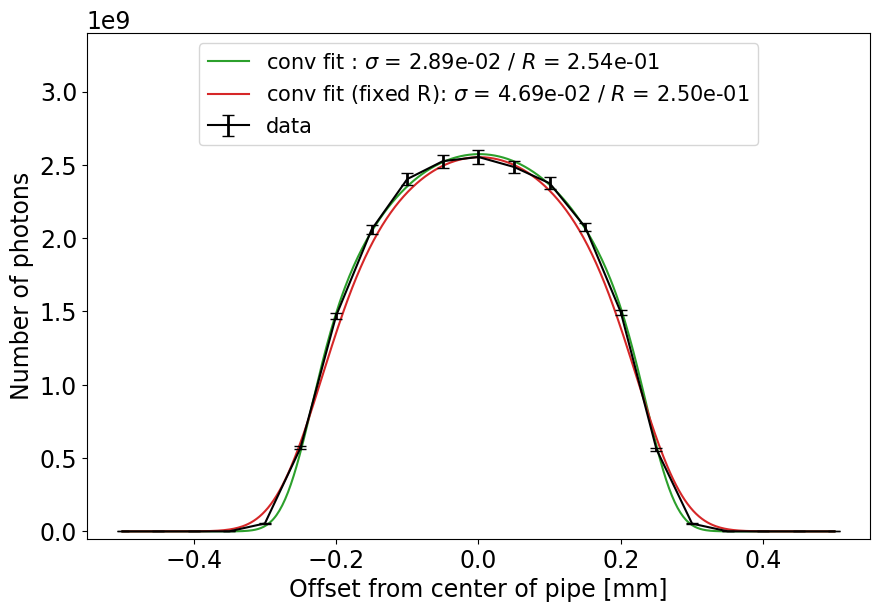

In [14]:
print(NPHOTONS)
beamWire.PlotConvolution(OFFSETS, NPHOTONS, ERRORS)
#beamWire.PlotConvolution(OFFSETS[2:-2], NPHOTONS[2:-2], ERRORS[2:-2])
_plt.ylim(-0.5e8, 3.4e9)
_plt.savefig("{}_photon_beam_scan_and_convolution_fit".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

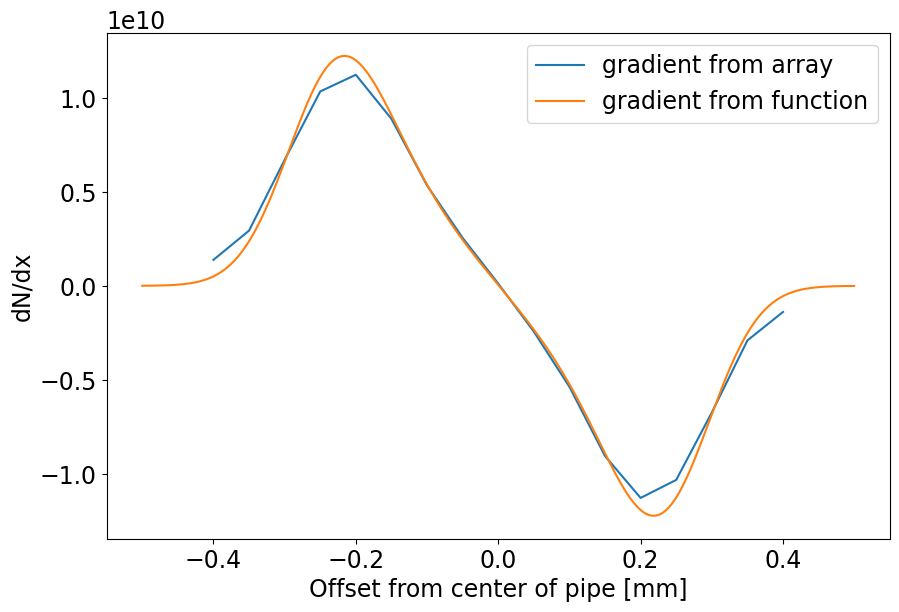

In [42]:
_plt.rcParams['font.size'] = 17
fig, ax = _plt.subplots(1,1,figsize=(9,6))
fig.tight_layout()

grad_array = _np.gradient(NPHOTONS[2:-2], OFFSETS[2:-2])
X = _np.linspace(-0.5, 0.5, 500)
popt, pcov = curve_fit(beamWire.func_conv, OFFSETS[2:-2], NPHOTONS[2:-2], p0=[3e9, 50e-3, 0, 250e-3])
grad_func = _np.gradient(beamWire.func_conv(X, A=popt[0], sigma=popt[1], mu=popt[2], R=popt[3]), X)

_plt.plot(OFFSETS[2:-2], grad_array, label='gradient from array')
_plt.plot(X, grad_func, label='gradient from function')

_plt.xlabel('Offset from center of pipe [mm]')
_plt.ylabel('dN/dx')
_plt.legend()

_plt.savefig("{}_derivative_of_photon_beam_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

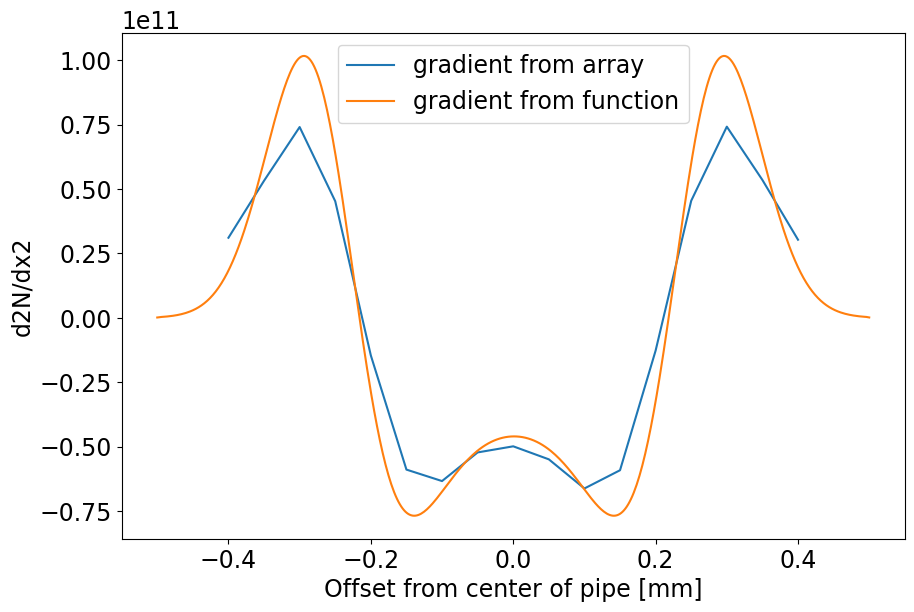

In [28]:
_plt.rcParams['font.size'] = 17
fig, ax = _plt.subplots(1,1,figsize=(9,6))
fig.tight_layout()

grad_array_2 = _np.gradient(grad_array, OFFSETS[2:-2])
grad_func_2 = _np.gradient(grad_func, X)

_plt.plot(OFFSETS[2:-2], grad_array_2, label='gradient from array')
_plt.plot(X, grad_func_2, label='gradient from function')

_plt.xlabel('Offset from center of pipe [mm]')
_plt.ylabel('d2N/dx2')
_plt.legend()

_plt.savefig("{}_second_derivative_of_photon_beam_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

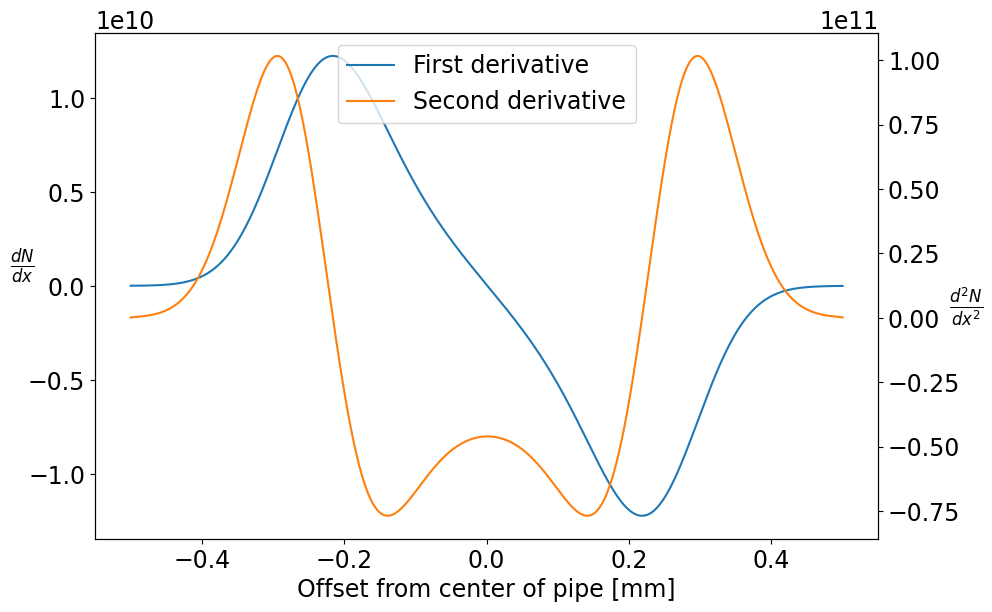

In [41]:
_plt.rcParams['font.size'] = 17
fig, ax = _plt.subplots(1,1,figsize=(9,6))
fig.tight_layout()

ax1 = _plt.gca()
ax2 = ax1.twinx()

X = _np.linspace(-0.5, 0.5, 500)
popt, pcov = curve_fit(beamWire.func_conv, OFFSETS[2:-2], NPHOTONS[2:-2], p0=[3e9, 50e-3, 0, 250e-3])
grad_func = _np.gradient(beamWire.func_conv(X, A=popt[0], sigma=popt[1], mu=popt[2], R=popt[3]), X)
grad_func_2 = _np.gradient(grad_func, X)

ax1.plot(X, grad_func, color='C0', label='First derivative')
ax1.set_ylabel(r"$\frac{dN}{dx}$", rotation='horizontal')

ax2.plot(X, grad_func_2, color='C1', label='Second derivative')
ax2.set_ylabel(r"$\frac{d^2N}{dx^2}$", rotation='horizontal')

ax1.set_xlabel('Offset from center of pipe [mm]')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
_plt.legend(h1 + h2, l1 + l2)

_plt.savefig("{}_derivatives_of_photon_beam_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

REBDSIMCOMBINE analysis file - using RebdsimFile


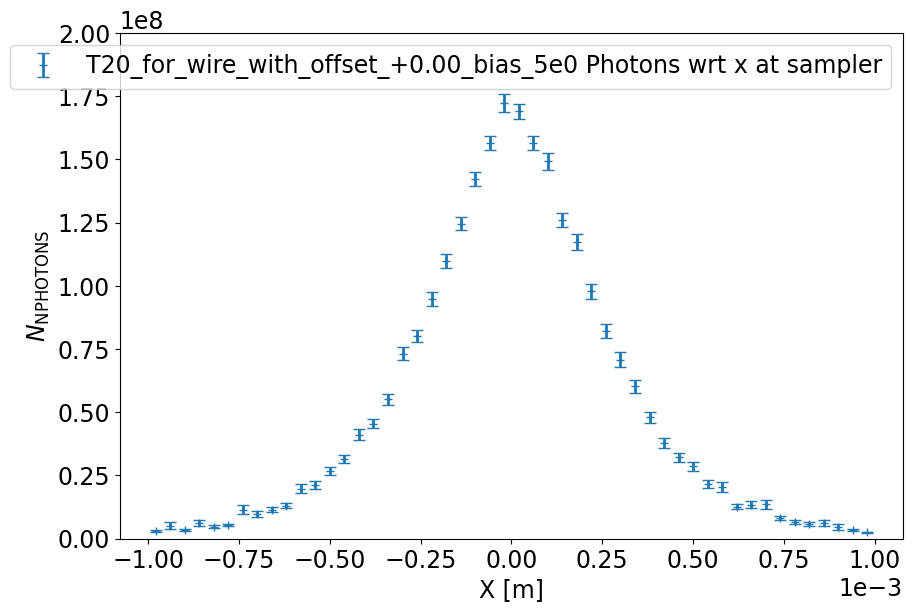

In [17]:
beamWire.plot_hist("../06_analysis/T20_for_wire_with_offset_+0.00_bias_5e0_merged_hist.root", "PHOTONS_X", steps=False, errorbars=True)
_plt.ticklabel_format(axis='both', style='sci', scilimits=(1,6))
_plt.ylim(0, 2e8)
_plt.ylabel("$N_{\\rm NPHOTONS}$")
_plt.xlabel("X [m]")
_plt.savefig("{}_photon_beam_X_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

REBDSIMCOMBINE analysis file - using RebdsimFile


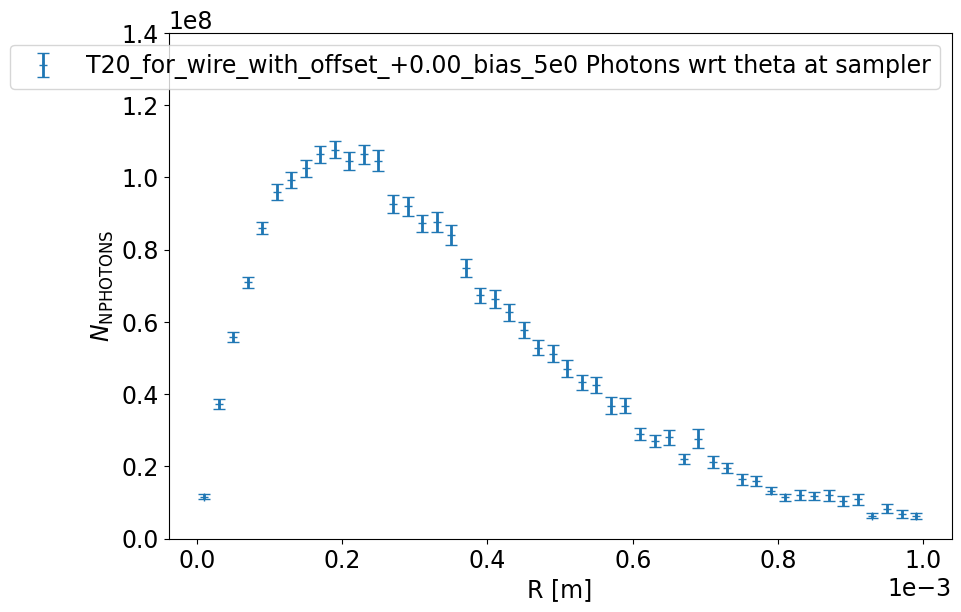

In [32]:
beamWire.plot_hist("../06_analysis/T20_for_wire_with_offset_+0.00_bias_5e0_merged_hist.root", "PHOTONS_Theta", steps=False, errorbars=True)
_plt.ticklabel_format(axis='both', style='sci', scilimits=(1,6))
_plt.ylim(0, 1.4e8)
_plt.ylabel("$N_{\\rm NPHOTONS}$")
_plt.xlabel("R [m]")
_plt.savefig("{}_photon_beam_R_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile


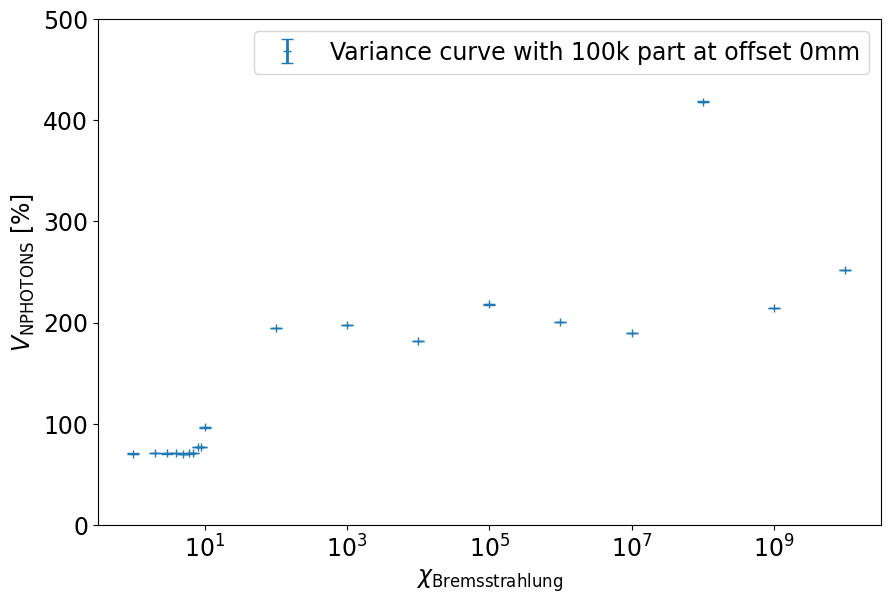

In [14]:
beamWire.plot_var("*T20_for_wire_with_offset_+0.00_bias_*e*_merged_hist.root","PHOTONS_R", errorbars=True, steps=False, xLogScale=True)
_plt.ylabel("$V_{\\rm NPHOTONS}$ [%]")
_plt.xlabel("$\chi_{\\rm Bremsstrahlung}$")
#_plt.xlim(1e0, 1e2)
_plt.ylim(0,500)
_plt.legend(['Variance curve with 100k part at offset 0mm'])
_plt.savefig("{}_Variance_plot_for_wire".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

REBDSIM analysis file - using RebdsimFile


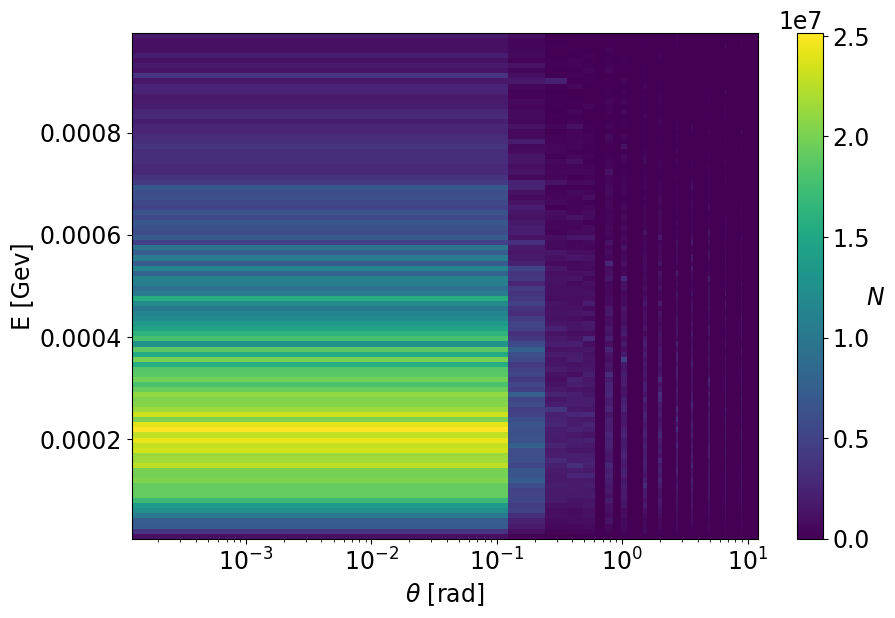

In [7]:
beamWire.plot_hist_2d("../06_analysis/TEST_50000_part_T20_for_wire_with_offset_+0.00_bias_5e0_hist.root", "PHOTONS_E_Theta",
                      nbins=100, xLogScale=True, yLogScale=False, zLogScale=False)
_plt.xlabel(r"$\theta$ [rad]")
_plt.ylabel("E [Gev]")

_plt.savefig("{}_energy_angle_correlation".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

REBDSIM analysis file - using RebdsimFile


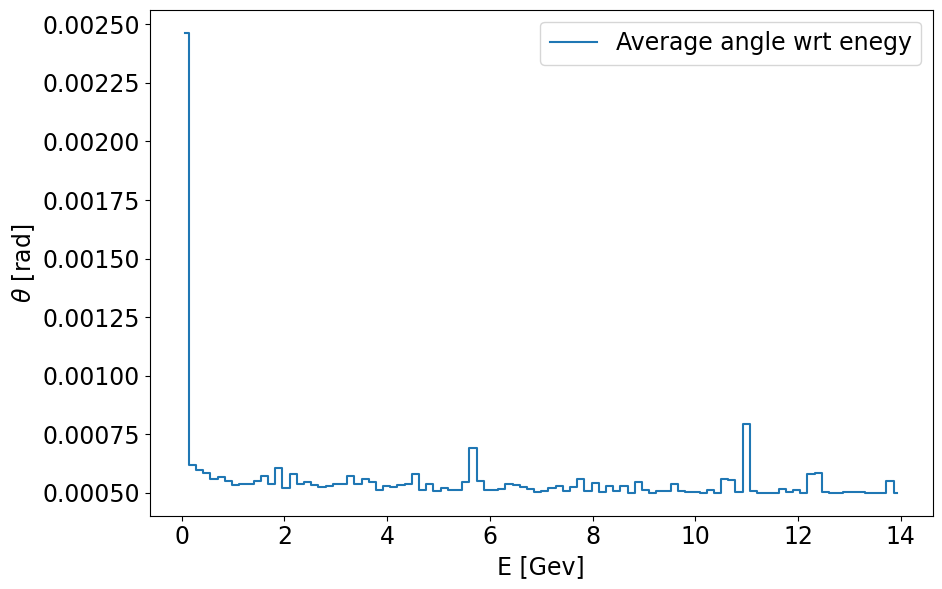

In [8]:
beamWire.plot_Theta_E("../06_analysis/TEST_50000_part_T20_for_wire_with_offset_+0.00_bias_5e0_hist.root", "PHOTONS_E_Theta")
_plt.xlabel("E [Gev]")
_plt.ylabel(r"$\theta$ [rad]")
_plt.legend(["Average angle wrt enegy"])

_plt.savefig("{}_average_angle_wrt_energy".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile
REBDSIMCOMBINE analysis file - using RebdsimFile


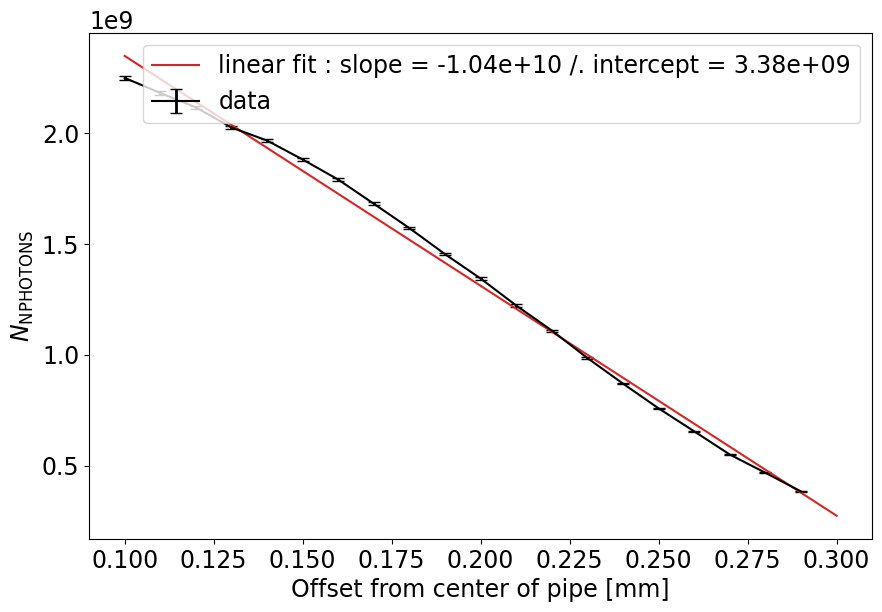

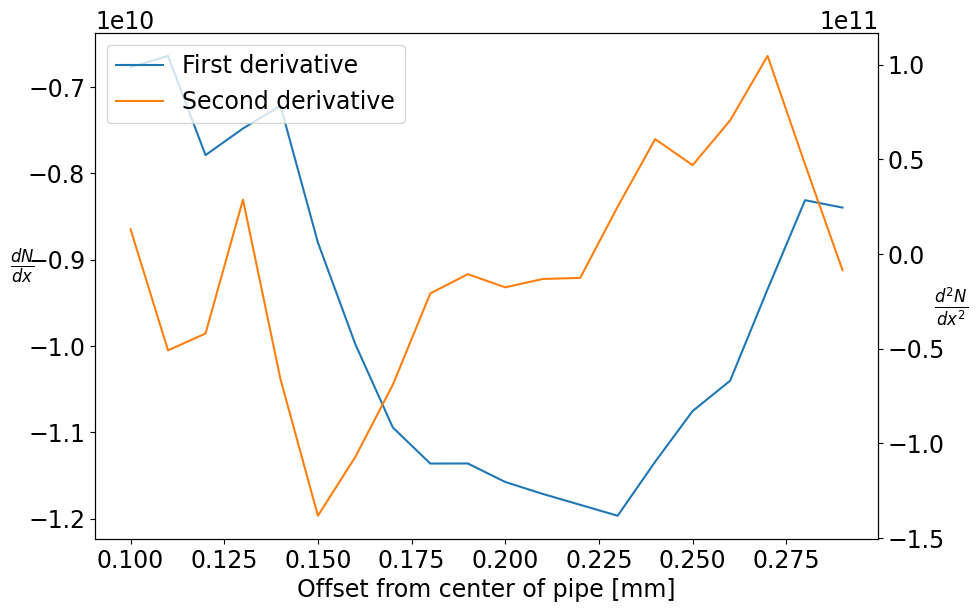

In [53]:
OFF, NPH, ERR = beamWire.countPhotonsInHistAllFiles('../06_analysis/T20_for_wire_with_offset_+0.[1-2][0-9]_bias_5e0_merged_hist.root', 'PHOTONS_R')

def linear(x, a, b):
    return a*x +b

_plt.rcParams['font.size'] = 17
fig, ax = _plt.subplots(1,1,figsize=(9,6))
fig.tight_layout()
_plt.errorbar(OFF, NPH, yerr=ERR, fmt="k", elinewidth=2, capsize=4, label='data')

X = _np.linspace(0.1, 0.3, 100)
popt, pcov = curve_fit(linear, OFF, NPH, p0=[3e9, -1e10])
_plt.plot(X, linear(X, a=popt[0], b=popt[1]), '-', color="C3", label='linear fit : slope = {:1.2e} /. intercept = {:1.2e}'.format(popt[0], popt[1]))
_plt.ylabel("$N_{\\rm NPHOTONS}$")
_plt.xlabel('Offset from center of pipe [mm]')

_plt.legend()


_plt.rcParams['font.size'] = 17
fig, ax = _plt.subplots(1,1,figsize=(9,6))
fig.tight_layout()

ax1 = _plt.gca()
ax2 = ax1.twinx()

grad_func = _np.gradient(NPH, OFF)
grad_func_2 = _np.gradient(grad_func, OFF)

ax1.plot(OFF, grad_func, color='C0', label='First derivative')
ax1.set_ylabel(r"$\frac{dN}{dx}$", rotation='horizontal')

ax2.plot(OFF, grad_func_2, color='C1', label='Second derivative')
ax2.set_ylabel(r"$\frac{d^2N}{dx^2}$", rotation='horizontal')

ax1.set_xlabel('Offset from center of pipe [mm]')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
_plt.legend(h1 + h2, l1 + l2)

_plt.savefig("{}_TEST_photon_beam_scan_and_linear_fit".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

In [21]:
_gl.glob('../06_analysis/T20_for_wire_with_offset_[-+]0.[0-9][05]_bias_5e0_merged_hist.root')

['../06_analysis/T20_for_wire_with_offset_+0.50_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_-0.40_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_+0.45_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_+0.35_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_-0.30_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_+0.20_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_-0.25_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_-0.20_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_+0.25_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_-0.35_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_+0.30_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_+0.40_bias_5e0_merged_hist.root',
 '../06_analysis/T20_for_wire_with_offset_-0.45_bias_5e0_merged_hist.root',
 '../06_anal